# Assignment 7. Part 1: Local Search & CSPs

## Local Search Overview

The preceding algorithms systematically search the space of assignments of values to variables. If the space is finite, they will either find a solution or report that no solution exists.

Unfortunately, many spaces are too big for systematic search and are possibly even infinite. In any reasonable time, systematic search will have failed to consider enough of the space to give any meaningful results.

**Local search methods** start with a total assignment of a value to each variable and try to improve this assignment iteratively by taking improving steps

***Iterative best improvement*** is a local search algorithm that selects a variable and value that most improves some `evaluation function`.

If there are several possible successors that most improve the evaluation function, one is chosen at random.

When the aim is to `minimize a function`, this algorithm is called **greedy descent**.

When the aim is to `maximize a function`, this is called **hill climbing** or greedy ascent.

Iterative best improvement requires a `way to evaluate each total assignment`.

For constraint satisfaction problems, a common evaluation function is the `number of constraints that are violated`. A violated constraint is called a **conflict**.

With the evaluation function being the number of conflicts, a solution is a total assignment with an evaluation of zero. Sometimes this evaluation function is refined by weighting some constraints more than others.

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A7/src' #@param {type: "string"}
sys.path.append(path)

As stated above, the` min_conflicts algorithm` is an efficient method to solve such a problem.

* In the start, all the variables of the CSP are randomly initialized.
* The algorithm then randomly selects a variable that has conflicts and violates some constraints of the CSP.
* The selected variable is then assigned a value that minimizes the number of conflicts.

This is a simple stochastic algorithm which works on a principle similar to Hill-climbing.

The conflicting state is repeatedly changed into a state with fewer conflicts in an attempt to reach an approximate solution.

## Min_conflicts algorithm example

In [ ]:
from utils import parse_neighbors

In [ ]:
neighbors1 = parse_neighbors('X: Y; Y: Z')
domains1 = {'X': [4,5,6,7], 'Y': [4,5,6,8,9], 'Z':[3,5,6,7,9]}
constraints1 = lambda X, x, Y, y: x==y

In [ ]:
neighbors1

defaultdict(list, {'X': ['Y'], 'Y': ['X', 'Z'], 'Z': ['Y']})

In [ ]:
from CSPclass import CSP

In [ ]:
CSP1=CSP(variables=None,neighbors=neighbors1, domains=domains1, constraints=constraints1)

In [ ]:
from algorithms import min_conflicts

In [ ]:
solution1=min_conflicts(CSP1)

var X domain:
[(4, 0), (5, 0), (6, 0), (7, 0)]
var Y domain:
[(4, 1), (5, 1), (6, 1), (8, 1), (9, 1)]
var Z domain:
[(3, 1), (5, 1), (6, 1), (7, 1), (9, 0)]
Start with an arbitrary assignment: {'X': 7, 'Y': 9, 'Z': 9}
The var. X was selected randomly
var X domain:
[(4, 1), (5, 1), (6, 1), (7, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 1), (5, 2), (6, 2), (8, 2), (9, 1)]
The var. X was selected randomly
var X domain:
[(4, 1), (5, 1), (6, 1), (7, 1)]
The var. Y was selected randomly
var Y domain:
[(4, 2), (5, 2), (6, 2), (8, 2), (9, 1)]
The va

In [ ]:
solution1

{'X': 6, 'Y': 6, 'Z': 6}

## Tasks -15 points

You need to build a schedule for 4 courses:
1. *Practical Programming Methodology* (2 lec, 2 labs per week)
2. *Algorithms I* (2 lec, 1 lab per week)
3. *Operating Systems* (2 lec, 1 lab per week)
4. *Introduction to File and Database Management* (2 lec, 1 lab per week)

Courses could be on *Monday, Tuesday, Wednesday, Thursday* and *Friday*.

Each day of week has 3 time slots (*class1, class2, class3*)

There can't be 2 lectures on the same course on the same day, but there can be a lecture and a lab on the same course on the same day.

For example:

```
Wrong case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Mon, class3: Practical Programming Methodology - lec

Correct case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Mon, class3: Practical Programming Methodology - lab
```

There can't be 2 lectures on the same course on an adjacent day, but there can be a lecture and a lab on the same course on an adjacent day.
```
Wrong case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lec

Correct case:
* Mon, class1: Practical Programming Methodology - lec
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lab
```

There can't be 2 labs on the same course on an adjacent day.
```
Wrong case:
* Mon, class1: Practical Programming Methodology - lab
* Mon, class2: Algorithms I - lec
* Tue, class1: Practical Programming Methodology - lab
```

Example of solution:


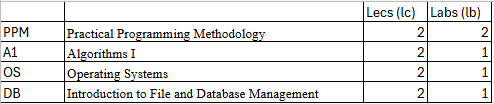

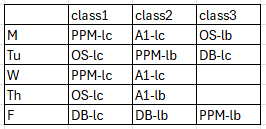

**Tasks:**
1. Formulate the problem (presented above) as a CSP problem. - 5 points
2. Develop CSP implementation (based on CSP class) - 5 points
3. Apply min_conflicts algorithm to solve the CSP. - 5 points